In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zamowienia.csv', sep=';')
df['date_time'] = pd.to_datetime(df['date_time']) # żeby odczytało to jako daty!
df = df.set_index('date_time')
df

,price
date_time,
2022-11-01 11:26:00,519.98
2022-11-03 00:03:00,109.98
2022-11-03 09:13:00,299.99
2022-11-03 18:45:00,119.98
2022-11-05 16:14:00,109.99
...,...
2023-10-29 10:43:00,120.94
2023-10-29 11:50:00,174.98
2023-10-29 14:13:00,130.92


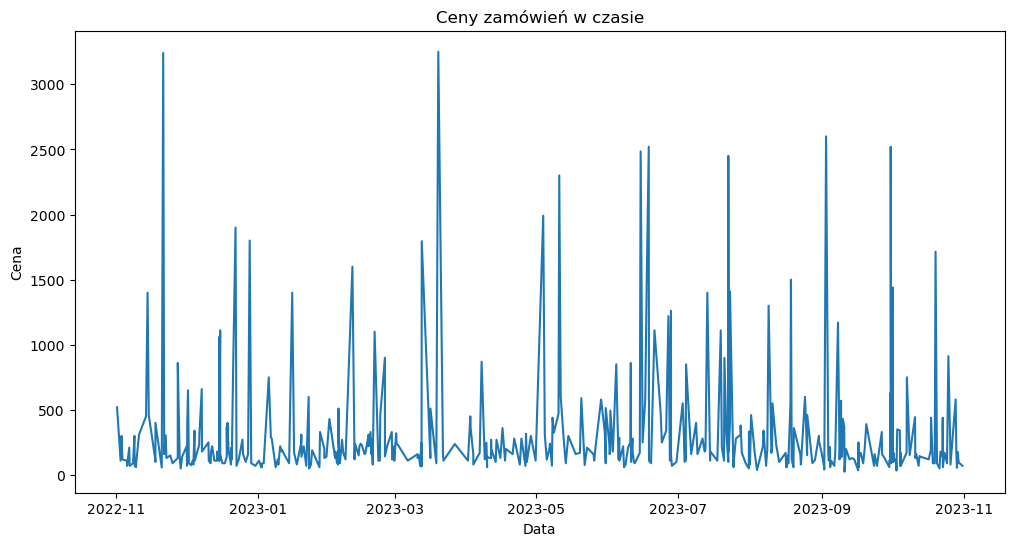

In [3]:
# Wykres szeregu czasowego
plt.figure(figsize=(12, 6))
plt.plot(df['price'])
plt.title('Ceny zamówień w czasie')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.show()

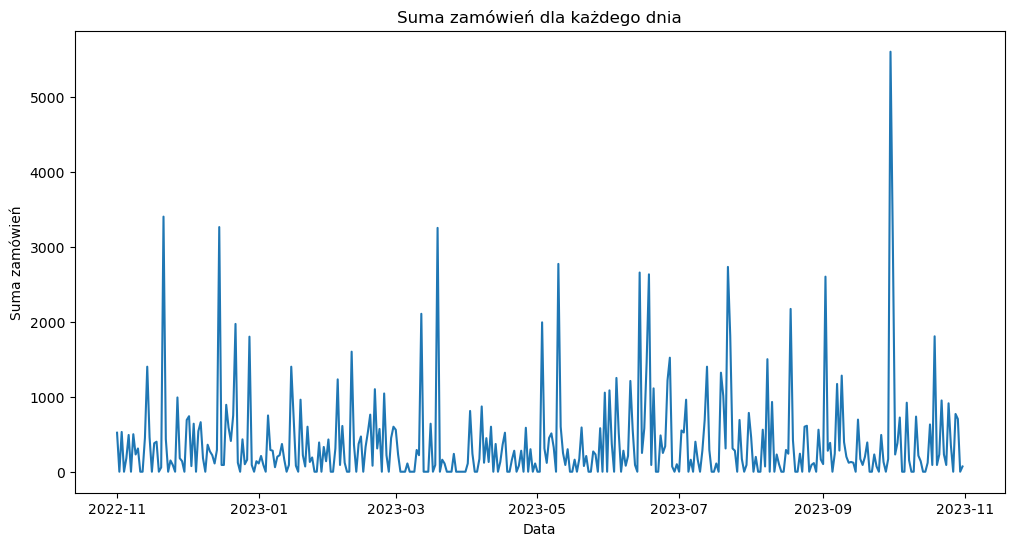

In [4]:
# Przeskalowanie danych - suma kwot zamówień dla każdego dnia
daily_sum = df.resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sum.index, daily_sum['price'])
plt.title('Suma zamówień dla każdego dnia')
plt.xlabel('Data')
plt.ylabel('Suma zamówień')
plt.show()

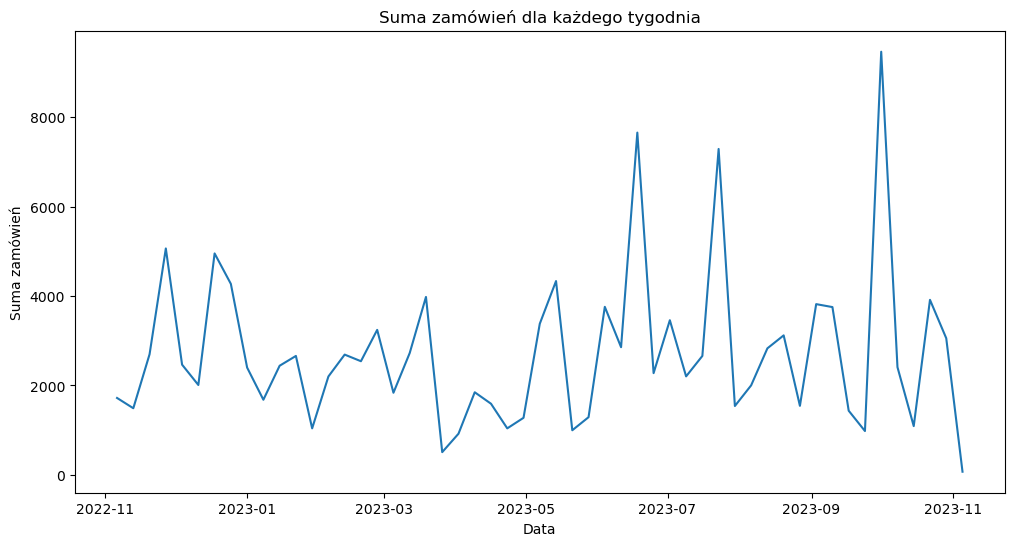

In [5]:
# Przeskalowanie danych - suma kwot zamówień dla każdego tygodnia
weekly_sum = df.resample('W').sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sum.index, weekly_sum['price'])
plt.title('Suma zamówień dla każdego tygodnia')
plt.xlabel('Data')
plt.ylabel('Suma zamówień')
plt.show()

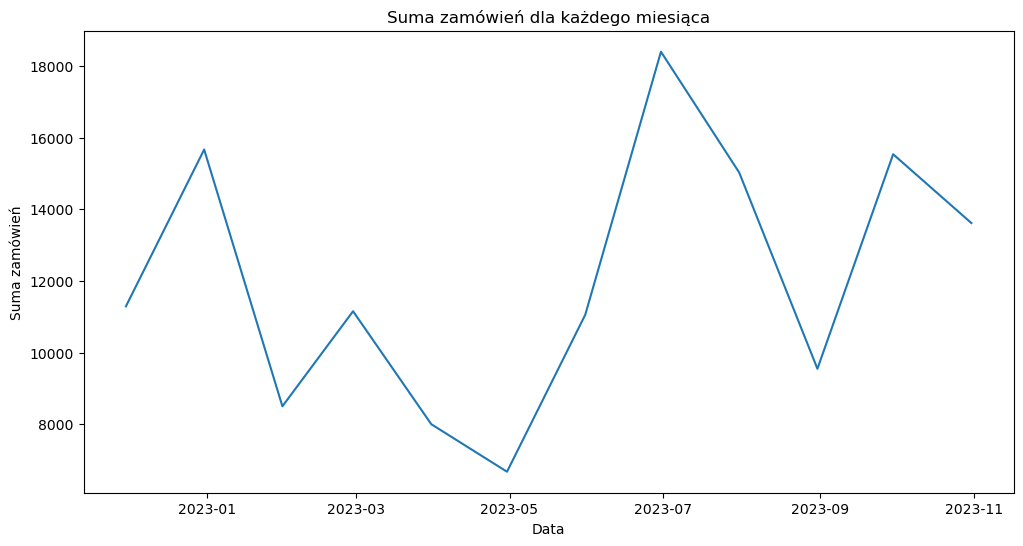

In [6]:
# Przeskalowanie danych - suma kwot zamówień dla każdego miesiąca
monthly_sum = df.resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum.index, monthly_sum['price'])
plt.title('Suma zamówień dla każdego miesiąca')
plt.xlabel('Data')
plt.ylabel('Suma zamówień')
plt.show()

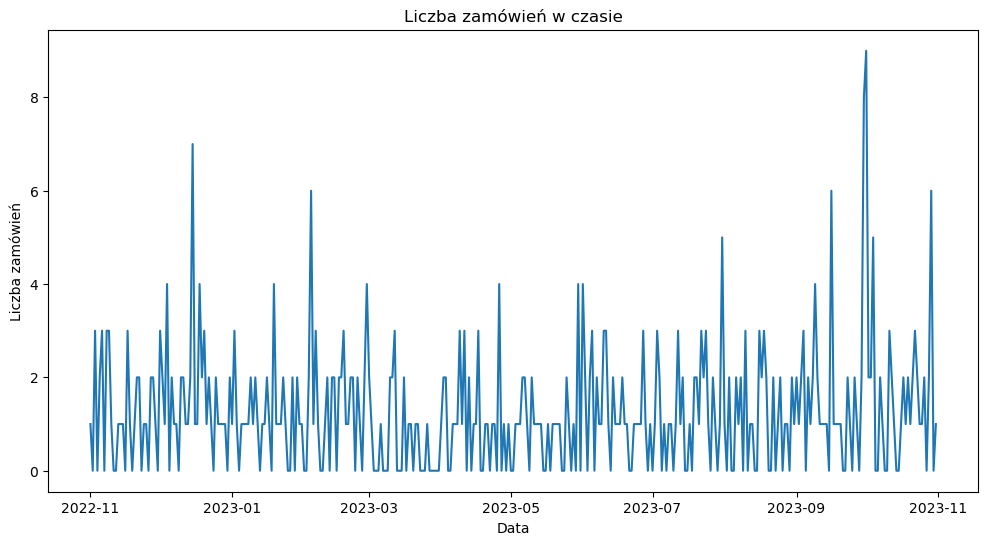

In [7]:
# Inna miara w szeregu - liczba zamówień w każdym dniu
df['order_count'] = 1
daily_orders = df.resample('D')['order_count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values)
plt.title('Liczba zamówień w czasie')
plt.xlabel('Data')
plt.ylabel('Liczba zamówień')
plt.show()

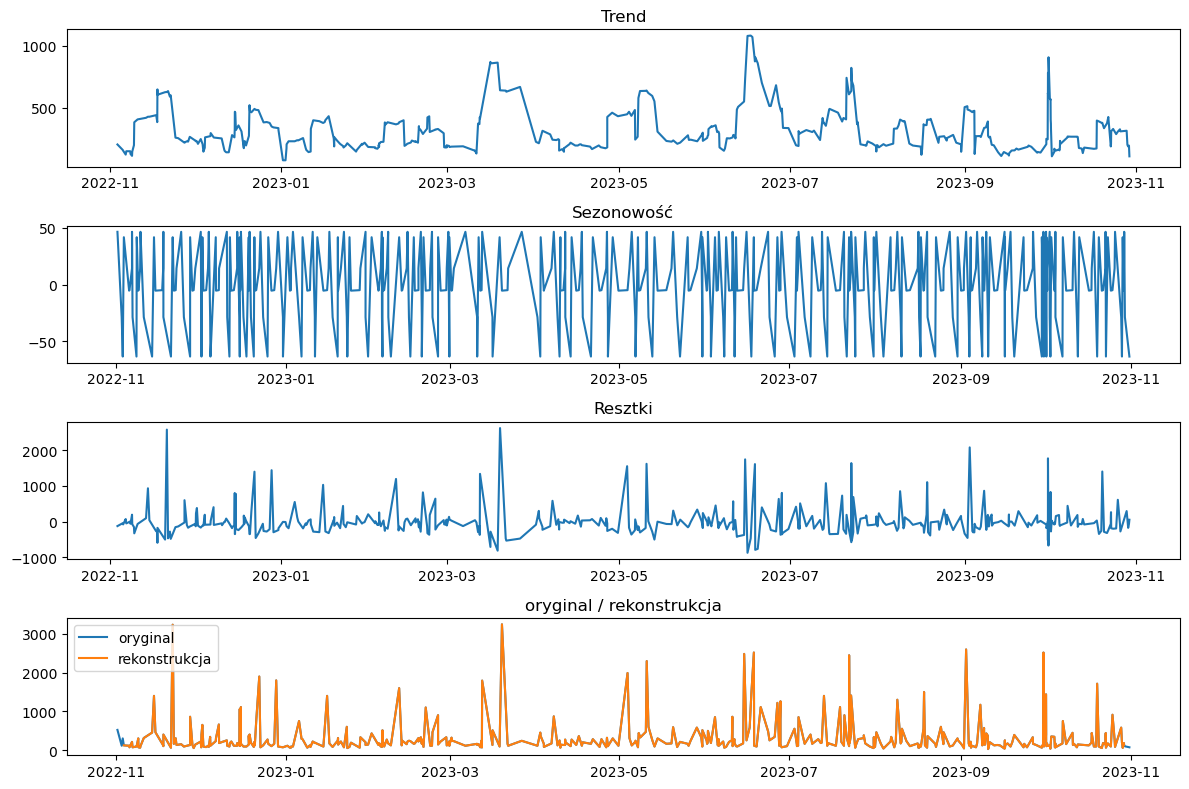

In [8]:
# Rozbicie na komponenty (trend, sezonowość, resztki)
from statsmodels.tsa.seasonal import seasonal_decompose

data = df['price']
# data = daily_sum
# data = weekly_sum

decomposition = seasonal_decompose(data, model='additive', period=7) # period musimy dobrać w zależności od danych!

# Przykładowo dla danych z całego roku
# period = 7 - wzorce co do dnia, bo 7 dni w tygodniu
# period = 52 - wzorce co do tygodnia, bo 52 tygodnie w roku
# period = 12 - wzorce miesięczne, bo 12 miesięcy w roku

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Sezonowość')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Resztki')

plt.subplot(4, 1, 4)
plt.plot(data, label='oryginal')
plt.plot(decomposition.trend + decomposition.seasonal + decomposition.resid, label='rekonstrukcja')
plt.title('oryginal / rekonstrukcja')

plt.legend()

plt.tight_layout()
plt.show()


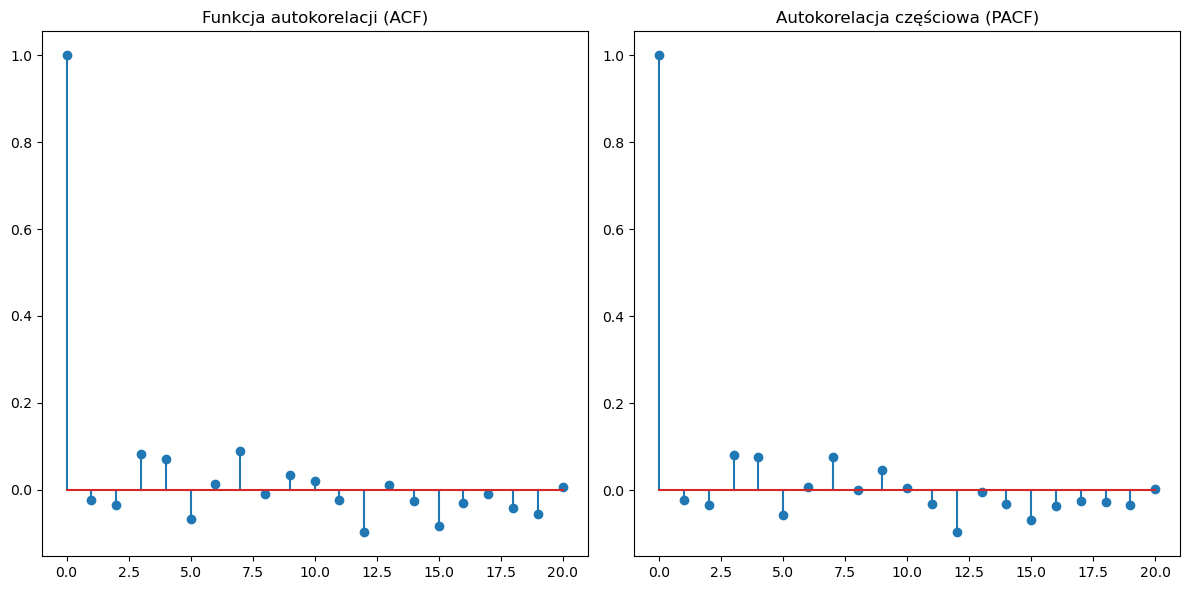

In [9]:
# Funkcja autokorelacji (ACF) i autokorelacja częściowa (PACF)
from statsmodels.tsa.stattools import acf, pacf

data = df['price']

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

# Wykresy ACF i PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(lag_acf)
plt.title('Funkcja autokorelacji (ACF)')

plt.subplot(1, 2, 2)
plt.stem(lag_pacf)
plt.title('Autokorelacja częściowa (PACF)')

plt.tight_layout()
plt.show()


In [10]:
# Analiza
#     Model AR (AutoRegressive):
#         Jeśli ACF maleje wolno, a PACF ma gwałtowny spadek, może to sugerować model AR o odpowiednim rzędzie.

#     Model MA (Moving Average):
#         Jeśli ACF ma gwałtowny spadek, a PACF maleje wolno, może to sugerować model MA o odpowiednim rzędzie.

#     Model ARIMA:
#         Jeśli ACF i PACF mają gwałtowne spadki, można rozważyć model ARIMA z obiema komponentami AR i MA.

#     Sezonowość:
#         Jeśli w ACF pojawiają się cykliczne wzorce, sugeruje to sezonowość w danych.